## 📊 Exploratory Data Analysis

This notebook presents a comprehensive analysis of various medical datasets, including medications, symptoms, and precautions. The goal is to explore the frequency and distribution of medications and symptoms related to different diseases. Let's dive into the data! 🚀

In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 💊 Medications Analysis

We begin by examining the medications dataset. The medications are evaluated based on their frequency across different diseases.

In [4]:
df_medication = pd.read_csv('/content/drive/MyDrive/Health Care /Data /medications.csv')
df_medication.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [5]:
df_medication['Medication'] = df_medication['Medication'].apply(ast.literal_eval)
medication_split = df_medication['Medication'].apply(pd.Series)
result_df = pd.concat([df_medication[['Disease']], medication_split], axis=1)
result_df.columns = ['Disease'] + [f'Medication_{i+1}' for i in range(medication_split.shape[1])]
result_df.head()

,Disease,Medication_1,Medication_2,Medication_3,Medication_4,Medication_5
0,Fungal infection,Antifungal Cream,Fluconazole,Terbinafine,Clotrimazole,Ketoconazole
1,Allergy,Antihistamines,Decongestants,Epinephrine,Corticosteroids,Immunotherapy
2,GERD,Proton Pump Inhibitors (PPIs),H2 Blockers,Antacids,Prokinetics,Antibiotics
3,Chronic cholestasis,Ursodeoxycholic acid,Cholestyramine,Methotrexate,Corticosteroids,Liver transplant
4,Drug Reaction,Antihistamines,Epinephrine,Corticosteroids,Antibiotics,Antifungal Cream


In [6]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Medication_1  41 non-null     object
 2   Medication_2  41 non-null     object
 3   Medication_3  41 non-null     object
 4   Medication_4  41 non-null     object
 5   Medication_5  41 non-null     object
dtypes: object(6)
memory usage: 2.0+ KB


In [7]:
result_df.describe()

,Disease,Medication_1,Medication_2,Medication_3,Medication_4,Medication_5
count,41,41,41,41,41,41
unique,41,28,32,34,31,33
top,Fungal infection,Antibiotics,Antiviral drugs,IV fluids,Corticosteroids,Liver transplant
freq,1,7,3,4,4,6


In [8]:
# Create a function to display the frequecy of items
def countplot_for_top_values(df, x_col, y_col, title, top_col):
    # Create the bar plot
    plt.figure(figsize=(10, 12))
    ax = sns.barplot(x=df[x_col], y=df[y_col], palette='coolwarm', hue=df[x_col])

    # Add data labels with frequency and top value above each bar
    for i, p in enumerate(ax.patches):
        top_value = df[top_col].iloc[i]
        frequency = df[y_col].iloc[i]
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height() + 0.05,
            f'{top_value}\n({frequency})',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold', color='black'
        )

    # Customize the plot
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(x_col)
    plt.tight_layout()
    plt.show()

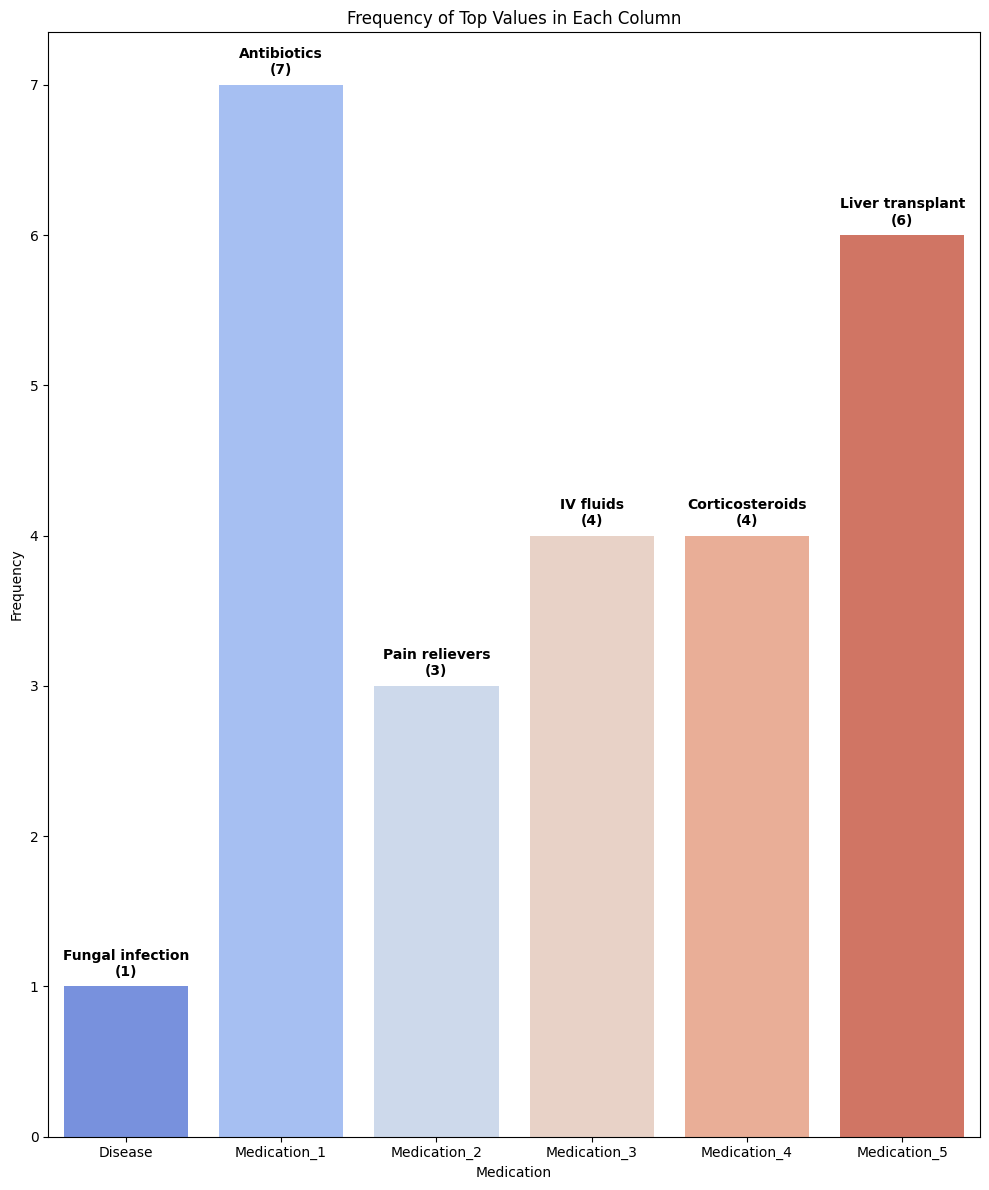

In [9]:
# Data for the frequency of top medications
mediications_top_values = {
    'Medication': ['Disease', 'Medication_1', 'Medication_2', 'Medication_3', 'Medication_4', 'Medication_5'],
    'Top Medication': ['Fungal infection', 'Antibiotics', 'Pain relievers', 'IV fluids', 'Corticosteroids', 'Liver transplant'],
    'Frequency': [1, 7, 3, 4, 4, 6]
}

# Create a DataFrame from the example data
df_top_values = pd.DataFrame(mediications_top_values)

# Call the function to create the count plot
countplot_for_top_values(df_top_values, 'Medication', 'Frequency', 'Frequency of Top Values in Each Column', 'Top Medication')

### 🤒 Symptoms Analysis

Next, we analyze the symptoms dataset. This section focuses on the distribution of symptoms reported by patients.

In [10]:
df_symtoms = pd.read_csv('/content/drive/MyDrive/Health Care /Data /symtoms_df.csv')
df_symtoms.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [11]:
df_symtoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4920 non-null   int64 
 1   Disease     4920 non-null   object
 2   Symptom_1   4920 non-null   object
 3   Symptom_2   4920 non-null   object
 4   Symptom_3   4920 non-null   object
 5   Symptom_4   4572 non-null   object
dtypes: int64(1), object(5)
memory usage: 230.8+ KB


In [12]:
df_symtoms.describe()

,Unnamed: 0
count,4920.000000
mean,2459.500000
std,1420.425992
min,0.000000
25%,1229.750000
50%,2459.500000
75%,3689.250000
max,4919.000000


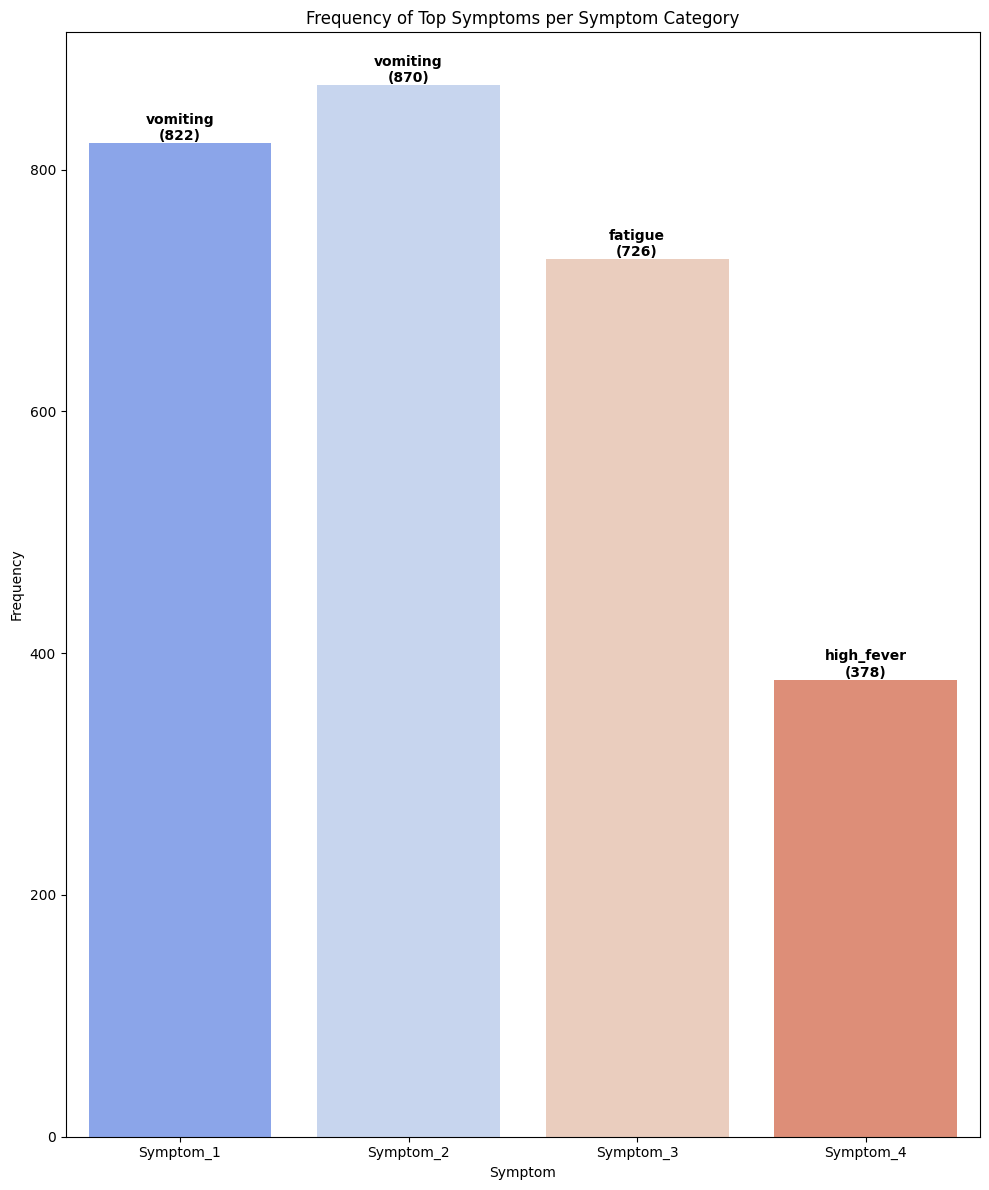

In [13]:
# Data for the frequency of top symptoms
symptoms_top_values = {
    'Symptom': ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4'],
    'Top Symptom': ['vomiting', 'vomiting', 'fatigue', 'high_fever'],
    'Frequency': [822, 870, 726, 378]
}

# Create a DataFrame for symptoms
df_symptoms = pd.DataFrame(symptoms_top_values)

# Call the function to create the count plot for symptoms frequency
countplot_for_top_values(df_symptoms, 'Symptom', 'Frequency', 'Frequency of Top Symptoms per Symptom Category', 'Top Symptom')

### ⚠️ Precautions Analysis

The analysis of the precautions dataset focuses on the preventive measures recommended for various conditions.

In [14]:
df_diets = pd.read_csv('/content/drive/MyDrive/Health Care /Data /diets.csv')
df_diets.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [15]:
df_diets['Diet'] = df_diets['Diet'].apply(ast.literal_eval)
Diet_split = df_diets['Diet'].apply(pd.Series)
result_df = pd.concat([df_diets[['Disease']], Diet_split], axis=1)
result_df.columns = ['Disease'] + [f'Diet{i+1}' for i in range(Diet_split.shape[1])]
result_df.head()

,Disease,Diet1,Diet2,Diet3,Diet4,Diet5
0,Fungal infection,Antifungal Diet,Probiotics,Garlic,Coconut oil,Turmeric
1,Allergy,Elimination Diet,Omega-3-rich foods,Vitamin C-rich foods,Quercetin-rich foods,Probiotics
2,GERD,Low-Acid Diet,Fiber-rich foods,Ginger,Licorice,Aloe vera juice
3,Chronic cholestasis,Low-Fat Diet,High-Fiber Diet,Lean proteins,Whole grains,Fresh fruits and vegetables
4,Drug Reaction,Antihistamine Diet,Omega-3-rich foods,Vitamin C-rich foods,Quercetin-rich foods,Probiotics


In [16]:
df_precaution = pd.read_csv('/content/drive/MyDrive/Health Care /Data /precautions_df.csv')
df_precaution.head()

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [17]:
df_precaution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    41 non-null     int64 
 1   Disease       41 non-null     object
 2   Precaution_1  41 non-null     object
 3   Precaution_2  41 non-null     object
 4   Precaution_3  40 non-null     object
 5   Precaution_4  40 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [18]:
df_precaution.describe()

,Unnamed: 0
count,41.000000
mean,20.000000
std,11.979149
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,40.000000


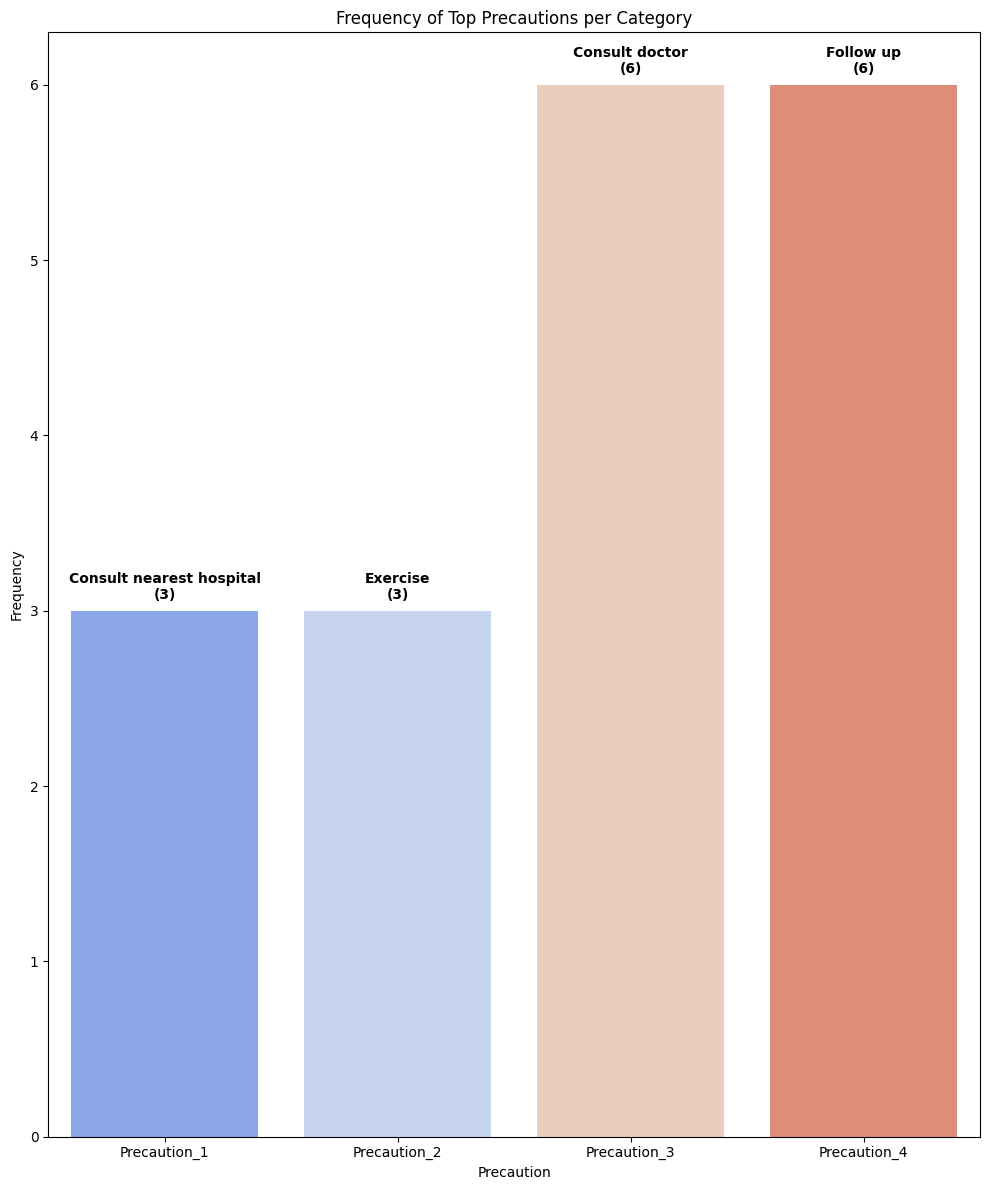

In [19]:
# Data for the frequency of top precautions
precautions_top_values = {
    'Precaution': ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4'],
    'Top Precaution': ['Consult nearest hospital', 'Exercise', 'Consult doctor', 'Follow up'],
    'Frequency': [3, 3, 6, 6]
}

# Create a DataFrame for precautions
df_precautions = pd.DataFrame(precautions_top_values)

# Call the updated function to create the count plot for precautions frequency
countplot_for_top_values(df_precautions, 'Precaution', 'Frequency', 'Frequency of Top Precautions per Category', 'Top Precaution')


### 📊 Comparative Analysis of Symptoms for Training

In [20]:
# Load the Data
data = pd.read_csv('/content/drive/MyDrive/Health Care /Data /Training.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [22]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data.isnull().sum().sum()

0

#####  Distribution of Symptoms

In [24]:
# Distribution of Symptoms
symptoms = data.columns[:-1]
symptom_counts = data[symptoms].sum()

# Create a DataFrame for Plotly
symptom_df = pd.DataFrame({'Symptom': symptom_counts.index, 'Count': symptom_counts.values})

# Create the interactive bar plot
fig = px.bar(symptom_df,
             x='Symptom',
             y='Count',
             title='Distribution of Symptoms',
             labels={'Count': 'Count of Occurrences'},
             hover_data={'Symptom': True, 'Count': True})

# Customize layout
fig.update_layout(
    xaxis_title="Symptoms",
    yaxis_title="Count",
    title_font_size=24,
    xaxis_tickangle=-45,
    paper_bgcolor='white',
    plot_bgcolor='white',
)

# Show the interactive plot
fig.show()


##### The Proportion of Patients Reporting these Symptoms

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# Data for Fatigue pie chart
fatigue_count = data['fatigue'].sum()
total_count = len(data)
fatigue_percentage = (fatigue_count / total_count) * 100

# Data for Joint Pain pie chart
joint_pain_count = data['joint_pain'].sum()
joint_pain_percentage = (joint_pain_count / total_count) * 100

# Create subplots: 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Percentage of Patients Reporting Fatigue', 'Percentage of Patients Reporting Joint Pain']
)

# Define colors
colors = ['#FF6F61', '#6BAED6']

# Fatigue pie chart
fig.add_trace(go.Pie(
    labels=['Fatigue', 'No Fatigue'],
    values=[fatigue_count, total_count - fatigue_count],
    hoverinfo='label+percent',
    textinfo='label+percent',
    marker=dict(colors=colors),
    pull=[0.1, 0],  # Pull out 'Fatigue' slice for emphasis
), 1, 1)

# Joint Pain pie chart
fig.add_trace(go.Pie(
    labels=['With Joint Pain', 'Without Joint Pain'],
    values=[joint_pain_count, total_count - joint_pain_count],
    hoverinfo='label+percent',
    textinfo='label+percent',
    marker=dict(colors=colors),
    pull=[0.1, 0],  # Pull out 'With Joint Pain' slice for emphasis
), 1, 2)

# Update layout
fig.update_layout(
    title_text='Comparative Analysis of Symptoms',
    title_font_size=24,
    annotations=[dict(text=f'Fatigue: {fatigue_percentage:.1f}%', x=0.17, y=0.5, font_size=12, showarrow=False),
                 dict(text=f'Joint Pain: {joint_pain_percentage:.1f}%', x=0.83, y=0.5, font_size=12, showarrow=False)],
    paper_bgcolor='white',
    plot_bgcolor='white',
)

# Show the interactive pie chart
fig.show()

##### Top 5 most reported symptoms

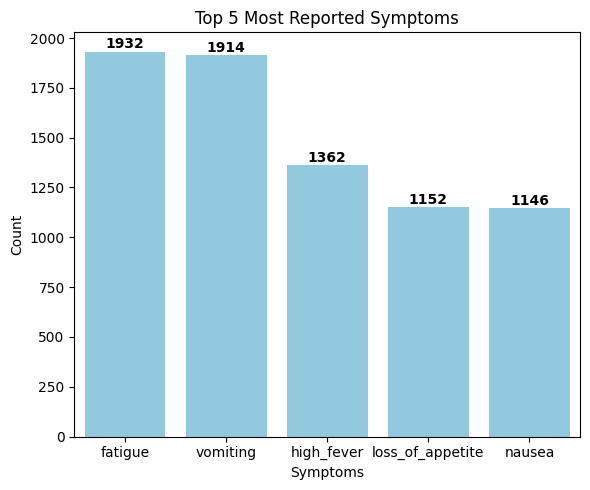

In [26]:
# Data: Top 5 most reported symptoms
top_symptoms = symptom_counts.nlargest(5)

# Create the bar plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=top_symptoms.index, y=top_symptoms.values, color='skyblue')

# Add data labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 2,
        f'{int(p.get_height())}',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='black'
    )

# Customize the plot
plt.title('Top 5 Most Reported Symptoms')
plt.ylabel('Count')
plt.xlabel('Symptoms')
plt.tight_layout()
plt.show()

##### Unique Symptoms per Diagnosis

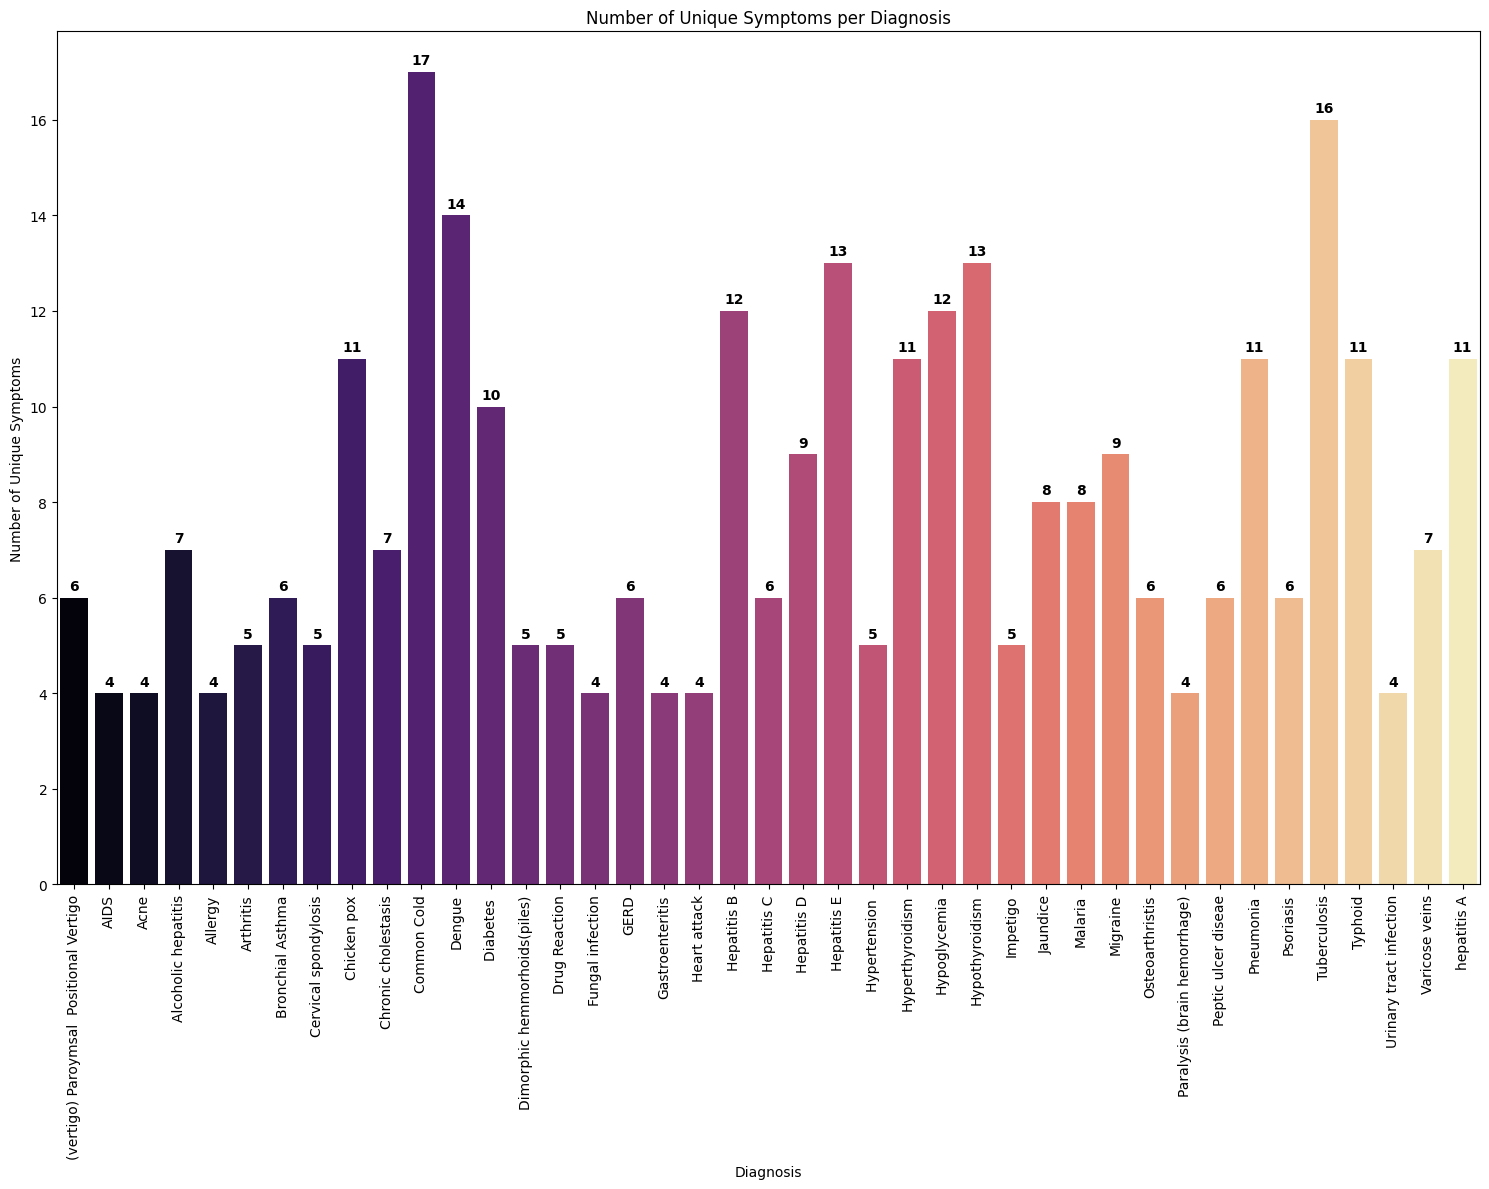

In [27]:
# Data: Unique symptoms per diagnosis
unique_symptoms = data.groupby('prognosis').sum().astype(bool).sum(axis=1)

# Create the bar plot
plt.figure(figsize=(15, 12))
ax = sns.barplot(x=unique_symptoms.index, y=unique_symptoms.values, palette='magma', hue=unique_symptoms.index)

# Add data labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.1,
        f'{int(p.get_height())}',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='black'
    )

# Customize the plot
plt.title('Number of Unique Symptoms per Diagnosis')
plt.ylabel('Number of Unique Symptoms')
plt.xlabel('Diagnosis')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 🔍 Conclusion

This analysis provides valuable insights into the patterns of medications, symptoms, and precautions in healthcare. The findings can guide healthcare professionals in making informed decisions and addressing patient needs more effectively.

By identifying prevalent symptoms and commonly prescribed medications, we can contribute to enhancing patient care and outcomes. Thank you for exploring this analysis! 🌟